# DPL EDA - PART 2
# Executive summary

# Installing libraries and extracting Dataset

In [1]:
# Packages
import pandas as pd
import numpy as np
from dateutil.parser import parse
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import math
import matplotlib.ticker
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopy.distance

# Visuals Setup
import IPython.core.display as di
%matplotlib inline
sns.set_style({'axes.facecolor':'white'})
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from IPython.display import display,Markdown
from IPython.display import HTML,IFrame

# Toggle Setup
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
di.display_html('''<button style="color:"black";right:75%;" onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
# Markdown Display
def printmd(string):
    display(Markdown(string))

In [3]:
df_storm = pd.read_csv('gs://aes-datahub-0002-curated/Outage_Restoration/DPL_Curated_Datasets/DPL_Master_dataset_v1.4_storm.csv')
df_storm['TIME_OF_FIRST_CALL'] = pd.to_datetime(df_storm['TIME_OF_FIRST_CALL'], infer_datetime_format = True, errors = 'coerce')

In [4]:
# Nearest location to service center
df_storm.Nearest_service_center.unique()

array(['DSB', 'Washington Court House', 'Marysville', 'Xenia',
       'North Dayton', 'Sidney', 'Greenville', 'Eaton'], dtype=object)

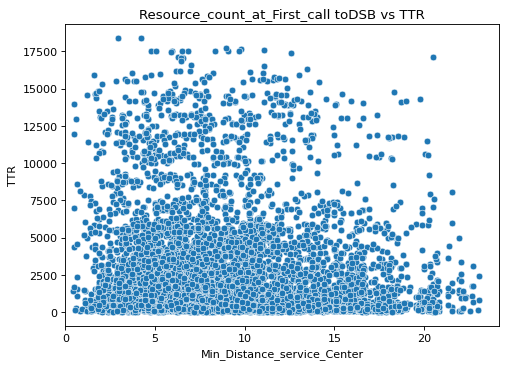

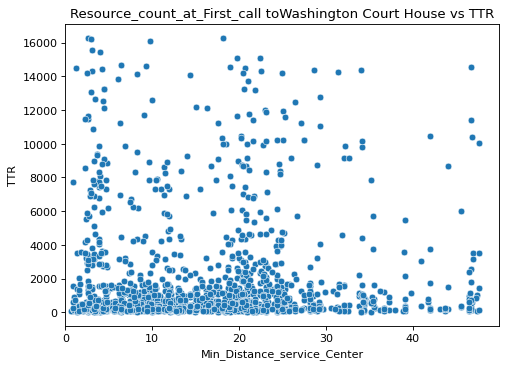

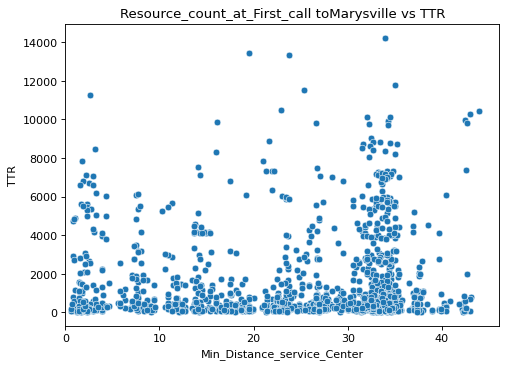

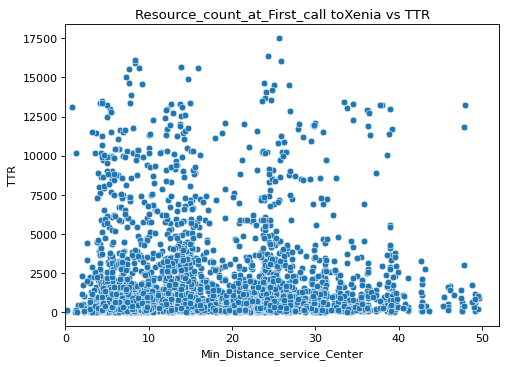

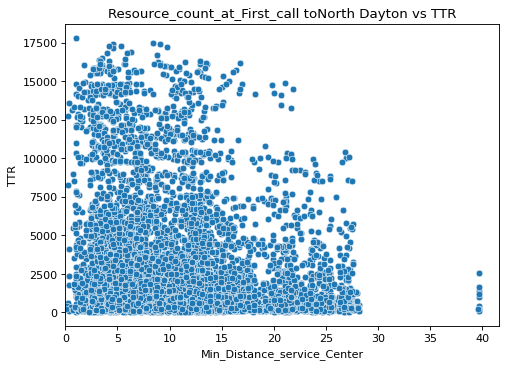

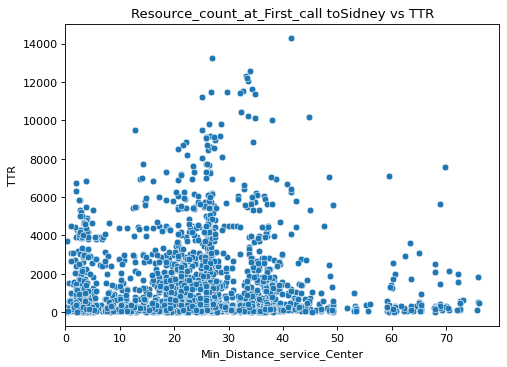

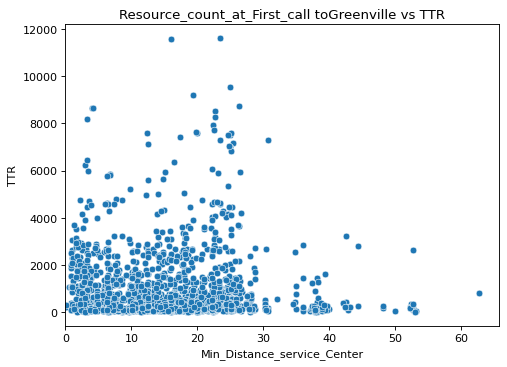

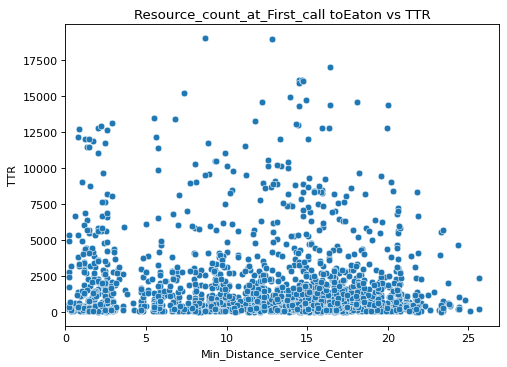

In [5]:
for i in df_storm.Nearest_service_center.unique():
    plt.figure(num = None,figsize=(7, 5),dpi=80,facecolor='w',edgecolor='k')
    temp_df = df_storm[df_storm.Nearest_service_center == i]
    temp_df = temp_df[['Min_Distance_service_Center','TTR']]

    ax = sns.scatterplot(x = temp_df['Min_Distance_service_Center'],y = temp_df['TTR'])
    title = 'Resource_count_at_First_call to' + i + ' vs TTR'
    ax.set_title(title)
    ax.set(xlim=(0, None))
    plt.plot()

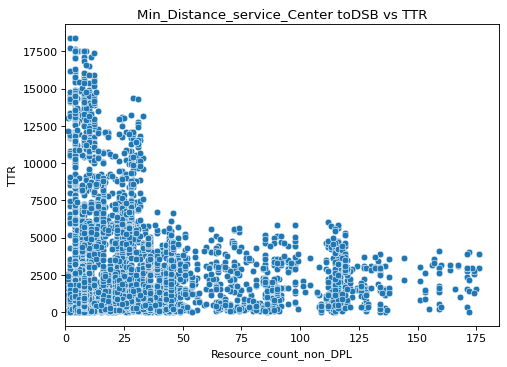

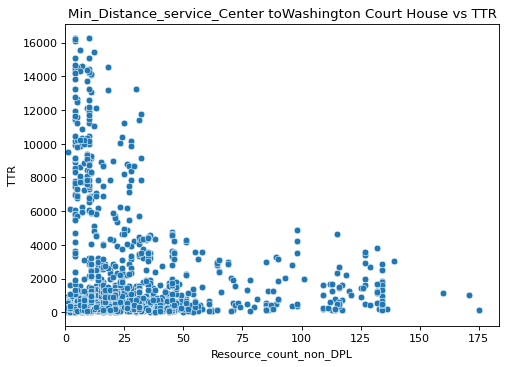

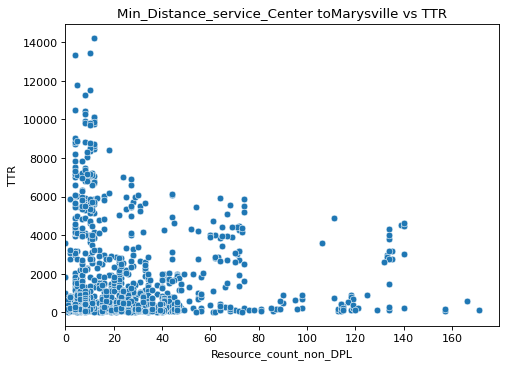

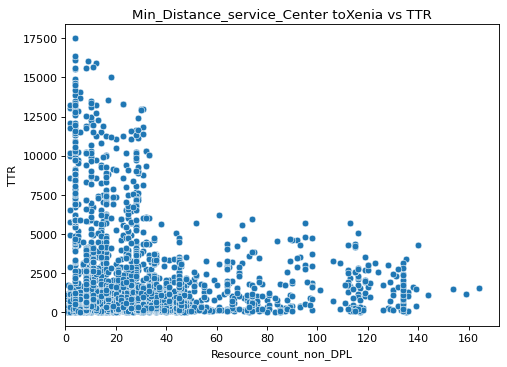

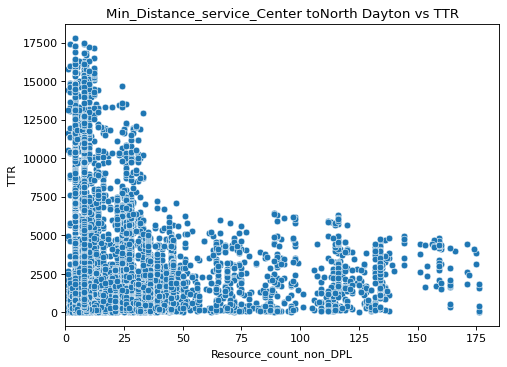

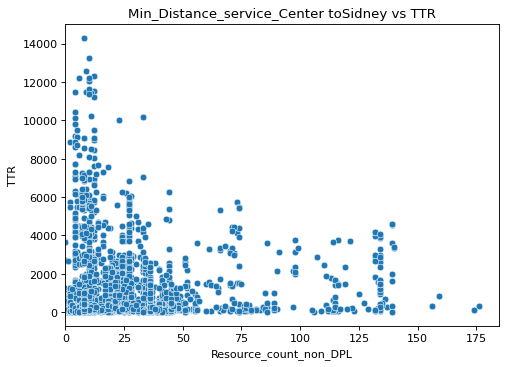

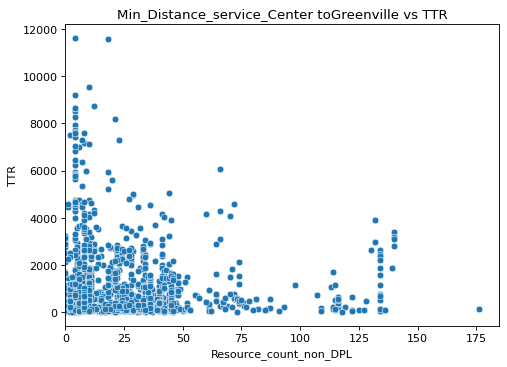

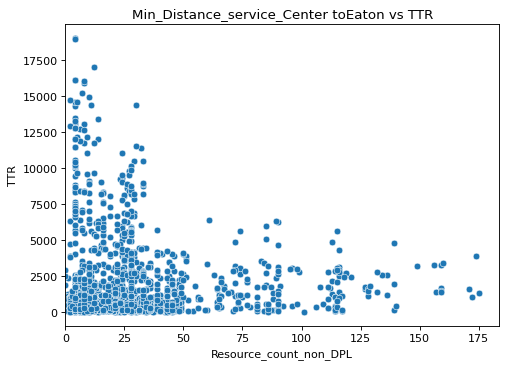

In [6]:
for i in df_storm.Nearest_service_center.unique():
    plt.figure(num = None,figsize=(7, 5),dpi=80,facecolor='w',edgecolor='k')
    temp_df = df_storm[df_storm.Nearest_service_center == i]
    temp_df = temp_df[['Resource_count_non_DPL','TTR']]
    
    ax = sns.scatterplot(x = temp_df['Resource_count_non_DPL'],y = temp_df['TTR'])
    title = 'Min_Distance_service_Center to' + i + ' vs TTR'
    ax.set_title(title)
    ax.set(xlim=(0, None))
    plt.plot()

[]

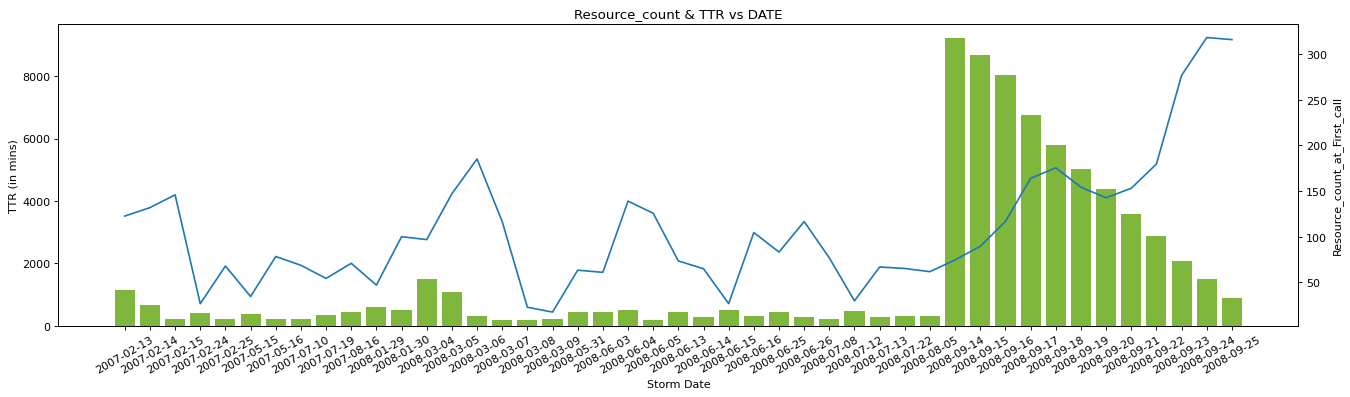

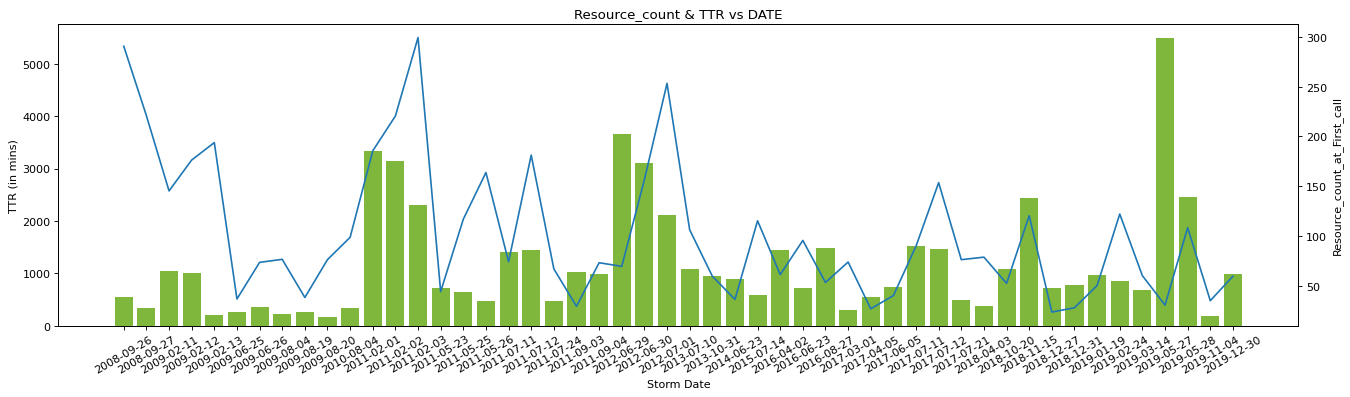

In [7]:
plt.figure(num = None,figsize=(20, 5),dpi=80,facecolor='w',edgecolor='k')

temp_df = df_storm[['Resource_count_at_First_call','DATE','TTR']]
temp_df = temp_df.groupby(['DATE'],as_index = False).agg({'Resource_count_at_First_call':'mean','TTR':'mean'})[:45]

ax = sns.barplot(x = temp_df['DATE'],y = temp_df['TTR'],palette = [ '#81cb29'])
ax2 = ax.twinx()
ax2 = sns.lineplot(x = temp_df['DATE'],y = temp_df['Resource_count_at_First_call'],palette = [ '#81cb29'])
ax.set(xlabel = 'Storm Date', ylabel = 'TTR (in mins)')
ax.set_xticklabels(labels =  temp_df['DATE'], rotation=30)

ax.set_title('Resource_count & TTR vs DATE')
ax.grid(False)  
plt.plot()

plt.figure(num = None,figsize=(20, 5),dpi=80,facecolor='w',edgecolor='k')

temp_df = df_storm[['Resource_count_at_First_call','DATE','TTR']]
temp_df = temp_df.groupby(['DATE'],as_index = False).agg({'Resource_count_at_First_call':'mean','TTR':'mean'})[45:]

ax = sns.barplot(x = temp_df['DATE'],y = temp_df['TTR'],palette = [ '#81cb29'])
ax2 = ax.twinx()
ax2 = sns.lineplot(x = temp_df['DATE'],y = temp_df['Resource_count_at_First_call'],palette = [ '#81cb29'])
ax.set(xlabel = 'Storm Date', ylabel = 'TTR (in mins)')
ax.set_xticklabels(labels =  temp_df['DATE'], rotation=30)

ax.set_title('Resource_count & TTR vs DATE')
ax.grid(False)  
plt.plot()

[]

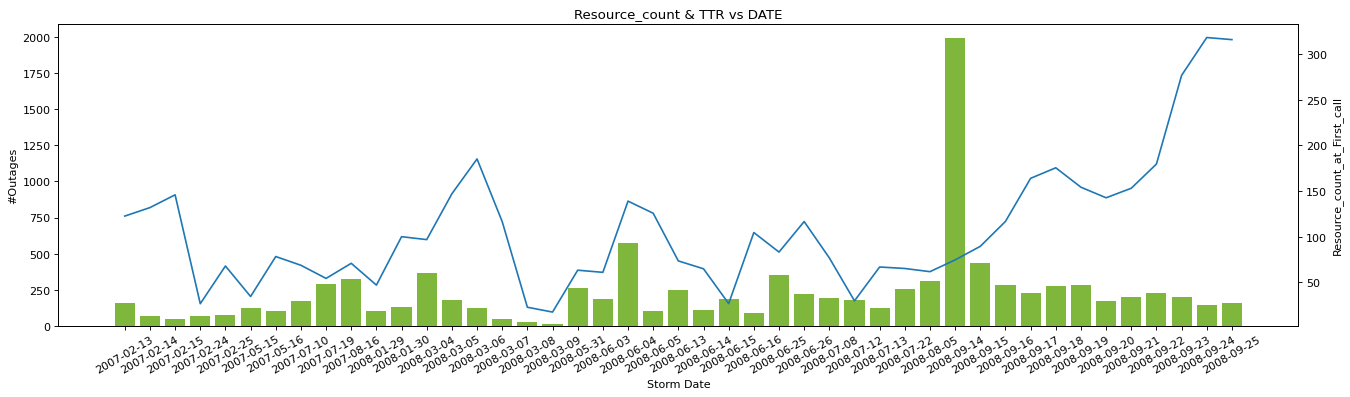

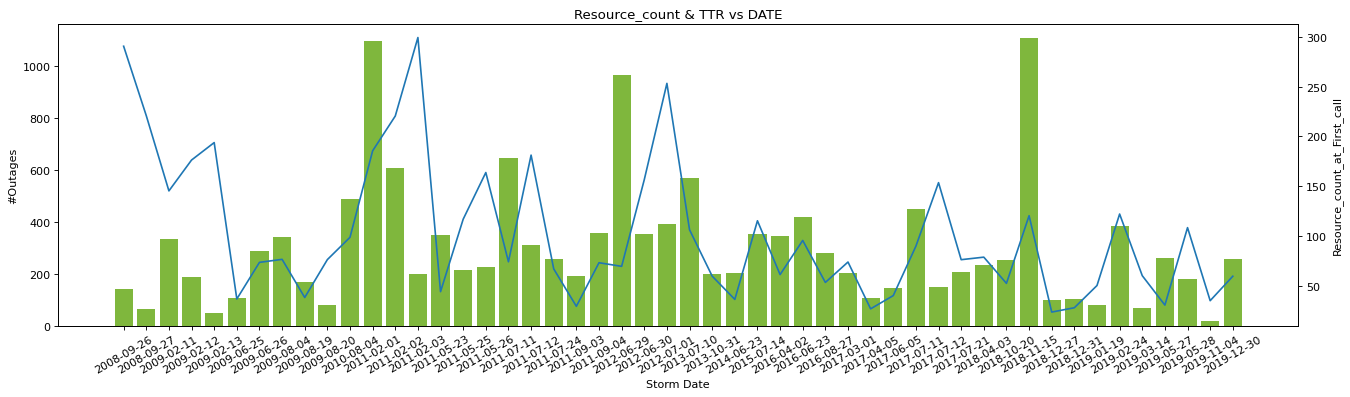

In [8]:
plt.figure(num = None,figsize=(20, 5),dpi=80,facecolor='w',edgecolor='k')

temp_df = df_storm[['Resource_count_at_First_call','DATE','TTR']]
temp_df = temp_df.groupby(['DATE'],as_index = False).agg({'Resource_count_at_First_call':'mean','TTR':'count'})[:45]

ax = sns.barplot(x = temp_df['DATE'],y = temp_df['TTR'],palette = [ '#81cb29'])
ax2 = ax.twinx()
ax2 = sns.lineplot(x = temp_df['DATE'],y = temp_df['Resource_count_at_First_call'],palette = [ '#81cb29'])
ax.set(xlabel = 'Storm Date', ylabel = '#Outages')
ax.set_xticklabels(labels =  temp_df['DATE'], rotation=30)

ax.set_title('Resource_count & TTR vs DATE')
ax.grid(False)  
plt.plot()

plt.figure(num = None,figsize=(20, 5),dpi=80,facecolor='w',edgecolor='k')

temp_df = df_storm[['Resource_count_at_First_call','DATE','TTR']]
temp_df = temp_df.groupby(['DATE'],as_index = False).agg({'Resource_count_at_First_call':'mean','TTR':'count'})[45:]

ax = sns.barplot(x = temp_df['DATE'],y = temp_df['TTR'],palette = [ '#81cb29'])
ax2 = ax.twinx()
ax2 = sns.lineplot(x = temp_df['DATE'],y = temp_df['Resource_count_at_First_call'],palette = [ '#81cb29'])
ax.set(xlabel = 'Storm Date', ylabel = '#Outages')
ax.set_xticklabels(labels =  temp_df['DATE'], rotation=30)

ax.set_title('Resource_count & TTR vs DATE')
ax.grid(False)  
plt.plot()

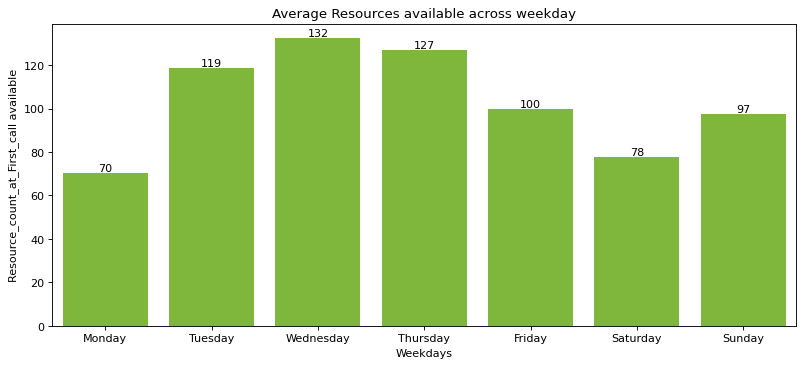

In [9]:
plt.figure(num = None,figsize=(12, 5),dpi=80,facecolor='w',edgecolor='k')

temp_df = df_storm[['Resource_count_at_First_call','weekday','TTR']]
temp_df = temp_df.groupby(['weekday'],as_index = False).agg({'Resource_count_at_First_call':'mean'})

ax = sns.barplot(x = temp_df['weekday'],y = temp_df['Resource_count_at_First_call'],palette = ['#81cb29'], order= ["Monday", "Tuesday",
                                                                                                                            "Wednesday", "Thursday", 
                                                                                                                            "Friday", "Saturday", "Sunday"])
ax.set(xlabel = 'Weekdays', ylabel = 'Resource_count_at_First_call available')
ax.set_title('Average Resources available across weekday')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
ax.grid(False)  

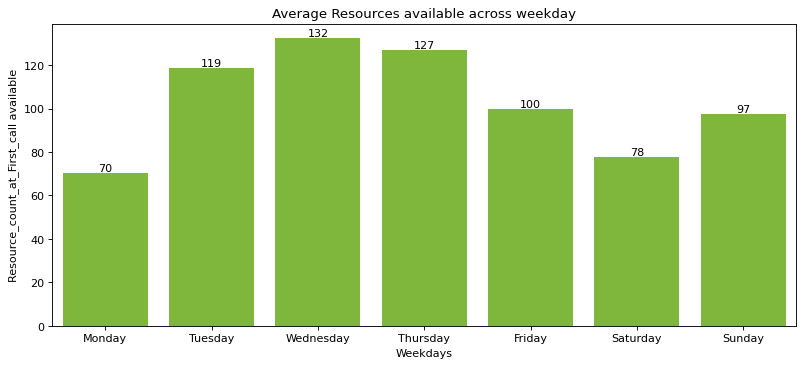

In [10]:
plt.figure(num = None,figsize=(12, 5),dpi=80,facecolor='w',edgecolor='k')

temp_df = df_storm[['Resource_count_at_First_call','weekday','TTR']]
temp_df = temp_df.groupby(['weekday'],as_index = False).agg({'Resource_count_at_First_call':'mean'})

ax = sns.barplot(x = temp_df['weekday'],y = temp_df['Resource_count_at_First_call'],palette = ['#81cb29'], order= ["Monday", "Tuesday",
                                                                                                                            "Wednesday", "Thursday", 
                                                                                                                            "Friday", "Saturday", "Sunday"])
ax.set(xlabel = 'Weekdays', ylabel = 'Resource_count_at_First_call available')
ax.set_title('Average Resources available across weekday')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
ax.grid(False)  

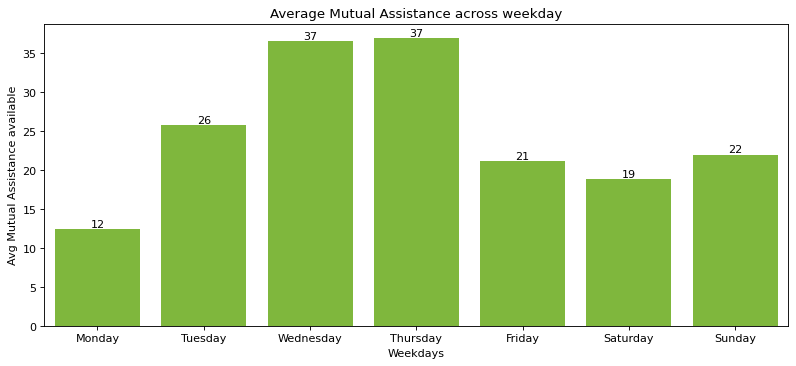

In [11]:

plt.figure(num = None,figsize=(12, 5),dpi=80,facecolor='w',edgecolor='k')

temp_df = df_storm[['Resource_count_non_DPL','weekday','TTR']]
temp_df = temp_df.groupby(['weekday'],as_index = False).agg({'Resource_count_non_DPL':'mean'})

ax = sns.barplot(x = temp_df['weekday'],y = temp_df['Resource_count_non_DPL'],palette = ['#81cb29'], order= ["Monday", "Tuesday",
                                                                                                                            "Wednesday", "Thursday", 
                                                                                                                            "Friday", "Saturday", "Sunday"])
ax.set(xlabel = 'Weekdays', ylabel = 'Avg Mutual Assistance available')
ax.set_title('Average Mutual Assistance across weekday')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
ax.grid(False)  

In [12]:
df_storm[df_storm.FIREEXPLOSION == True].sort_values('TTR',ascending = False)[['TTR', 'Nearest_service_center','DATE']].reset_index(drop = True)

,TTR,Nearest_service_center,DATE
0,17035.30,DSB,2008-09-14
1,13207.12,North Dayton,2008-09-14
2,11604.90,DSB,2008-09-17
3,10061.85,DSB,2008-09-16
4,8827.25,Washington Court House,2008-09-14
5,8547.90,DSB,2008-09-14
6,7840.07,DSB,2008-09-14
7,7806.00,North Dayton,2008-09-15
8,6059.22,DSB,2008-09-16
9,5211.17,North Dayton,2008-09-23


In [13]:
df_storm.groupby(['DATE','Nearest_service_center'],as_index = False).agg({'TTR':'count'})

,DATE,Nearest_service_center,TTR
0,2007-02-13,DSB,4
1,2007-02-13,Eaton,2
2,2007-02-13,Greenville,1
3,2007-02-13,Marysville,3
4,2007-02-13,North Dayton,8
...,...,...,...
742,2019-12-30,Marysville,21
743,2019-12-30,North Dayton,59
744,2019-12-30,Sidney,19
745,2019-12-30,Washington Court House,13


In [16]:
'''
plt.figure(num = None,figsize=(12, 5),dpi=80,facecolor='w',edgecolor='k')

temp_df = ads[['Resource_count_non_DPL','DATE','TTR']]
temp_df = temp_df.groupby(['DATE'],as_index = False).agg({'TTR':'Count'})

ax = sns.barplot(x = temp_df['DATE'],y = temp_df['TTR'],palette = ['#81cb29'])
ax.set(xlabel = 'DATE', ylabel = 'Avg Mutual Assistance available')
ax.set_title('Average Mutual Assistance across weekday')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
ax.grid(False)  
'''

"\nplt.figure(num = None,figsize=(12, 5),dpi=80,facecolor='w',edgecolor='k')\n\ntemp_df = ads[['Resource_count_non_DPL','DATE','TTR']]\ntemp_df = temp_df.groupby(['DATE'],as_index = False).agg({'TTR':'Count'})\n\nax = sns.barplot(x = temp_df['DATE'],y = temp_df['TTR'],palette = ['#81cb29'])\nax.set(xlabel = 'DATE', ylabel = 'Avg Mutual Assistance available')\nax.set_title('Average Mutual Assistance across weekday')\nfor p in ax.patches:\n    x=p.get_bbox().get_points()[:,0]\n    y=p.get_bbox().get_points()[1,1]\n    ax.annotate('{:.0f}'.format(y), (x.mean(), y), \n            ha='center', va='bottom') # set the alignment of the text\nax.grid(False)  \n"

In [17]:
import folium  
from folium import plugins
from folium.plugins import HeatMap

map_hooray = folium.Map(location=[39.960447, -84.192133],zoom_start = 9) 
ads = df_storm[df_storm.FIREEXPLOSION == True]
# Ensure you're handing it floats
ads['LATITUDE'] = ads['LATITUDE'].astype(float)
ads['LONGITUDE'] = ads['LONGITUDE'].astype(float)
ads['TIME_OF_FIRST_CALL'] = pd.to_datetime(ads['TIME_OF_FIRST_CALL'],errors='coerce')
ads['Year'] = ads.TIME_OF_FIRST_CALL.dt.year

# Filter the DF for rows, then columns, then remove NaNs
heat_df = ads[ads.Year == 2008][['LATITUDE', 'LONGITUDE']]

# Create weight column, using date
heat_df = heat_df.dropna(axis=0, subset=['LATITUDE', 'LONGITUDE'])
heat_df['combined'] = list(zip(heat_df.LATITUDE, heat_df.LONGITUDE))

heat_data = list(heat_df.combined)

# Plot it on the map
hm = plugins.HeatMap(heat_data,auto_play=True,max_opacity=0.2,max_val=0.6, radius=10, blur=10, gradient=None, overlay=True, control=True, show=False)
hm.add_to(map_hooray)
# Display the map
map_hooray

In [ ]:
df_storm[df_storm.ACCOUNT_TYPE_CUS == True][['TTR','DATE','']]

In [18]:
import folium  
from folium import plugins
from folium.plugins import HeatMap

map_hooray = folium.Map(location=[39.960447, -84.192133],zoom_start = 9) 
ads = df_storm[df_storm.ACCOUNT_TYPE_CUS == True]
# Ensure you're handing it floats
ads['LATITUDE'] = ads['LATITUDE'].astype(float)
ads['LONGITUDE'] = ads['LONGITUDE'].astype(float)
ads['TIME_OF_FIRST_CALL'] = pd.to_datetime(ads['TIME_OF_FIRST_CALL'],errors='coerce')
ads['Year'] = ads.TIME_OF_FIRST_CALL.dt.year

# Filter the DF for rows, then columns, then remove NaNs
heat_df = ads[['LATITUDE', 'LONGITUDE']]

# Create weight column, using date
heat_df = heat_df.dropna(axis=0, subset=['LATITUDE', 'LONGITUDE'])
heat_df['combined'] = list(zip(heat_df.LATITUDE, heat_df.LONGITUDE))

heat_data = list(heat_df.combined)

# Plot it on the map
hm = plugins.HeatMap(heat_data,auto_play=True,max_opacity=0.2,max_val=0.6, radius=10, blur=10, gradient=None, overlay=True, control=True, show=False)
hm.add_to(map_hooray)
# Display the map
map_hooray